In [129]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
df = pd.read_csv(r"Seismic_Bumps/seismic-bumps.csv")

In [131]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0


In [132]:
# we keep shift, genergy, gpuls, nbumps4, energy, seismoacoustic, class 
column2drop = ['gdenergy', 'gdpuls', 'nbumps', 'nbumps2', 'nbumps3', 'seismic', 'maxenergy', 'hazard'] 
df.drop(column2drop, axis=1, inplace=True)

In [133]:
df

,seismoacoustic,shift,genergy,gpuls,nbumps4,nbumps5,energy,class
0,a,N,15180,48,0,0,0,0
1,a,N,14720,33,0,0,2000,0
2,a,N,8050,30,0,0,0,0
3,a,N,28820,171,0,0,3000,0
4,a,N,12640,57,0,0,0,0
...,...,...,...,...,...,...,...,...
2558,a,W,81410,785,0,0,0,0
2559,a,W,42110,555,0,0,0,0
2560,a,W,26960,540,0,0,0,0
2561,a,W,16130,322,0,0,0,0


In [134]:
df['GenergyBin'] = pd.qcut(df['genergy'], 4)
df['GpulsBin'] = pd.qcut(df['gpuls'], 4)
#df['EnergyBin'] = pd.qcut(df['energy'], 4)

df.drop(['genergy', 'gpuls'], axis=1, inplace=True)


In [135]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin
0,a,N,0,0,0,0,"(11560.0, 25390.0]","(1.999, 189.0]"
1,a,N,0,0,2000,0,"(11560.0, 25390.0]","(1.999, 189.0]"
2,a,N,0,0,0,0,"(99.999, 11560.0]","(1.999, 189.0]"
3,a,N,0,0,3000,0,"(25390.0, 52010.0]","(1.999, 189.0]"
4,a,N,0,0,0,0,"(11560.0, 25390.0]","(1.999, 189.0]"
...,...,...,...,...,...,...,...,...
2558,a,W,0,0,0,0,"(52010.0, 1766860.0]","(661.5, 3915.0]"
2559,a,W,0,0,0,0,"(25390.0, 52010.0]","(376.0, 661.5]"
2560,a,W,0,0,0,0,"(25390.0, 52010.0]","(376.0, 661.5]"
2561,a,W,0,0,0,0,"(11560.0, 25390.0]","(189.0, 376.0]"


In [136]:
df['GenergyBin'] = df['GenergyBin'].astype(str) + '_Genergy'
df['GpulsBin'] = df['GpulsBin'].astype(str) + '_Gpuls'
df['nbumps4'] = df['nbumps4'].astype(str) + '_Nbumps4'
df['nbumps5'] = df['nbumps5'].astype(str) + '_Nbumps5'
df['energy'] = df['energy'].astype(str) + '_Energy'

In [137]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin
0,a,N,0_Nbumps4,0_Nbumps5,0_Energy,0,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
1,a,N,0_Nbumps4,0_Nbumps5,2000_Energy,0,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
2,a,N,0_Nbumps4,0_Nbumps5,0_Energy,0,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls"
3,a,N,0_Nbumps4,0_Nbumps5,3000_Energy,0,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls"
4,a,N,0_Nbumps4,0_Nbumps5,0_Energy,0,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
...,...,...,...,...,...,...,...,...
2558,a,W,0_Nbumps4,0_Nbumps5,0_Energy,0,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls"
2559,a,W,0_Nbumps4,0_Nbumps5,0_Energy,0,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls"
2560,a,W,0_Nbumps4,0_Nbumps5,0_Energy,0,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls"
2561,a,W,0_Nbumps4,0_Nbumps5,0_Energy,0,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls"


In [138]:
class_dict = {0: 'Non_Hazardous', 1: 'Hazardous'}
seism_dict = {'a': 'Lack_of_hazard', 'b': 'Low_hazard', 'c': 'High_hazard', 'd': 'Danger_state'}
shift_dict = {'N': 'Preparation_shift', 'W': 'Coal_getting_shift'}
df['class'] = df['class'].map(class_dict)
df['seismoacoustic'] = df['seismoacoustic'].map(seism_dict)
df['shift'] = df['shift'].map(shift_dict)

In [139]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls"
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls"
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls"
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls"
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls"
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls"


In [140]:
X = df.values.tolist()
X[0]

['Lack_of_hazard',
 'Preparation_shift',
 '0_Nbumps4',
 '0_Nbumps5',
 '0_Energy',
 'Non_Hazardous',
 '(11560.0, 25390.0]_Genergy',
 '(1.999, 189.0]_Gpuls']

In [141]:
from fim import apriori

In [142]:
#Frequent itemsets (prova)
supp = [85, 50, 30, 20, 10, 5, 4, 3, 2, 0.9, 0.8]
target = ["a", "c", "m"]

for s in supp:
    for t in target:
        itemsets = apriori(X, target=t, supp=s, report="s")
        print("Support:", s, "Target:",t)
        print("Frequent itemsets:", len(itemsets))
        print()

Support: 85 Target: a
Frequent itemsets: 7

Support: 85 Target: c
Frequent itemsets: 5

Support: 85 Target: m
Frequent itemsets: 1

Support: 50 Target: a
Frequent itemsets: 31

Support: 50 Target: c
Frequent itemsets: 17

Support: 50 Target: m
Frequent itemsets: 3

Support: 30 Target: a
Frequent itemsets: 67

Support: 30 Target: c
Frequent itemsets: 34

Support: 30 Target: m
Frequent itemsets: 5

Support: 20 Target: a
Frequent itemsets: 195

Support: 20 Target: c
Frequent itemsets: 99

Support: 20 Target: m
Frequent itemsets: 22

Support: 10 Target: a
Frequent itemsets: 607

Support: 10 Target: c
Frequent itemsets: 268

Support: 10 Target: m
Frequent itemsets: 30

Support: 5 Target: a
Frequent itemsets: 1095

Support: 5 Target: c
Frequent itemsets: 468

Support: 5 Target: m
Frequent itemsets: 48

Support: 4 Target: a
Frequent itemsets: 1263

Support: 4 Target: c
Frequent itemsets: 528

Support: 4 Target: m
Frequent itemsets: 41

Support: 3 Target: a
Frequent itemsets: 1586

Support: 3 

In [143]:
#cerco i frequent itemsets -- altro metodo
# report indica le metriche di valutazione dell'association rule -> S = support, C = confidence, l= lift value of a rule (confidence/prior)
# supp indica il support minimo (il default è 10 quindi non serve metterlo)
# zmin indica il numero minimo di item nell'itemset, zmax il massimo
# target indica il tipo di itemset che stiamo carcando -> r = association rule
# conf indica il minimum confidence 
itemsets = apriori(X, supp=20, zmin=3, zmax=6, target='s', conf=20, report='aS') 
print(itemsets[:6])

[(('(376.0, 661.5]_Gpuls', 'Coal_getting_shift', '0_Nbumps5'), 541, 21.10807647288334), (('(376.0, 661.5]_Gpuls', 'Non_Hazardous', '0_Nbumps5'), 599, 23.371049551307063), (('(376.0, 661.5]_Gpuls', 'Non_Hazardous', '0_Nbumps4', '0_Nbumps5'), 572, 22.317596566523605), (('(376.0, 661.5]_Gpuls', 'Non_Hazardous', '0_Nbumps4'), 572, 22.317596566523605), (('(376.0, 661.5]_Gpuls', '0_Nbumps4', '0_Nbumps5'), 608, 23.72220054623488), (('(25390.0, 52010.0]_Genergy', 'Coal_getting_shift', '0_Nbumps5'), 546, 21.30316035895435)]


In [144]:
itemsets.sort(key=lambda x: x[2],reverse=True) #ordina in base al support

#for x in itemsets:
for x in range(0, 11):
#    if x[0]== '1_Nbumps4':
        print(itemsets[x])
        

(('Non_Hazardous', '0_Nbumps4', '0_Nbumps5'), 2261, 88.21693328131096)
(('Coal_getting_shift', '0_Nbumps4', '0_Nbumps5'), 1501, 58.56418259851737)
(('Coal_getting_shift', 'Non_Hazardous', '0_Nbumps5'), 1493, 58.25204838080374)
(('Lack_of_hazard', '0_Nbumps4', '0_Nbumps5'), 1476, 57.5887631681623)
(('Lack_of_hazard', 'Non_Hazardous', '0_Nbumps5'), 1467, 57.23761217323449)
(('0_Energy', '0_Nbumps4', '0_Nbumps5'), 1462, 57.042528287163485)
(('0_Energy', 'Non_Hazardous', '0_Nbumps4', '0_Nbumps5'), 1422, 55.4818571985954)
(('0_Energy', 'Non_Hazardous', '0_Nbumps4'), 1422, 55.4818571985954)
(('0_Energy', 'Non_Hazardous', '0_Nbumps5'), 1422, 55.4818571985954)
(('Lack_of_hazard', 'Non_Hazardous', '0_Nbumps4', '0_Nbumps5'), 1387, 54.11626999609832)
(('Lack_of_hazard', 'Non_Hazardous', '0_Nbumps4'), 1387, 54.11626999609832)


In [237]:
itemsets = apriori(X, supp=50, zmin=3, zmax=6, target='r', conf=50, report='SCl') 

print(itemsets[:6])

[('Lack_of_hazard', ('0_Energy', 'Non_Hazardous', '0_Nbumps4', '0_Nbumps5'), 34.02262973078424, 61.32208157524614, 1.002350096156606), ('0_Energy', ('Lack_of_hazard', 'Non_Hazardous', '0_Nbumps4', '0_Nbumps5'), 34.02262973078424, 62.86950252343186, 1.1021514019668666), ('Lack_of_hazard', ('0_Energy', 'Non_Hazardous', '0_Nbumps4'), 34.02262973078424, 61.32208157524614, 1.002350096156606), ('0_Energy', ('Lack_of_hazard', 'Non_Hazardous', '0_Nbumps4'), 34.02262973078424, 62.86950252343186, 1.1021514019668666), ('Lack_of_hazard', ('0_Energy', 'Non_Hazardous', '0_Nbumps5'), 34.02262973078424, 61.32208157524614, 1.002350096156606), ('0_Energy', ('Lack_of_hazard', 'Non_Hazardous', '0_Nbumps5'), 34.02262973078424, 59.44103612815269, 1.042047712698053)]


In [238]:
itemsets.sort(key=lambda x: x[4],reverse=True) #ordina in base al support

for x in itemsets:
#for x in range(0, 11):
    if x[0]== 'Non_Hazardous':
        print(x)
        

('Non_Hazardous', ('0_Energy', '0_Nbumps4', '0_Nbumps5'), 55.4818571985954, 97.2640218878249, 1.0417371002862315)
('Non_Hazardous', ('0_Energy', '0_Nbumps4'), 55.4818571985954, 97.2640218878249, 1.0417371002862315)
('Non_Hazardous', ('0_Energy', '0_Nbumps5'), 55.4818571985954, 97.2640218878249, 1.0417371002862315)
('Non_Hazardous', ('Lack_of_hazard', '0_Nbumps4', '0_Nbumps5'), 54.11626999609832, 93.97018970189703, 1.0064588224235773)
('Non_Hazardous', ('Lack_of_hazard', '0_Nbumps4'), 54.11626999609832, 93.97018970189703, 1.0064588224235773)
('Non_Hazardous', ('0_Nbumps4', '0_Nbumps5'), 88.21693328131096, 93.8953488372093, 1.005657246426107)
('Non_Hazardous', ('Lack_of_hazard', '0_Nbumps5'), 57.23761217323449, 93.55867346938776, 1.0020513167657368)
('Non_Hazardous', ('Coal_getting_shift', '0_Nbumps4', '0_Nbumps5'), 53.41396800624268, 91.20586275816123, 0.9768517603391861)
('Non_Hazardous', ('Coal_getting_shift', '0_Nbumps4'), 53.41396800624268, 91.14513981358189, 0.9762013929887605)
('N

In [147]:
itemsets = apriori(X, supp=10, zmin=3, zmax=6, target='r', conf=18, report='aSCl') 
print(itemsets[:6])

[('1_Nbumps4', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Lack_of_hazard', '0_Nbumps5'), 50, 1.9508388607101055, 18.796992481203006, 3.4167866474697384), ('1_Nbumps4', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Lack_of_hazard'), 50, 1.9508388607101055, 18.796992481203006, 3.4167866474697384), ('1_Nbumps4', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift', 'Non_Hazardous', '0_Nbumps5'), 63, 2.458056964494733, 18.421052631578945, 3.3484509145203436), ('1_Nbumps4', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift', 'Non_Hazardous'), 63, 2.458056964494733, 18.421052631578945, 3.3484509145203436), ('1_Nbumps4', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift', '0_Nbumps5'), 76, 2.96527506827936, 18.225419664268586, 3.312890113441162), ('1_Nbumps4', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift'), 76, 2.96527506827936, 18.181818181818183, 3.

In [148]:
itemsets.sort(key=lambda x: x[3],reverse=True) #ordina in base al support

for x in itemsets:
#for x in range(0, 11):
    if x[0]== 'Hazardous':
        print(x)
        

('Hazardous', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift'), 76, 2.96527506827936, 18.181818181818183, 2.7411764705882353)
('Hazardous', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', '0_Nbumps4'), 63, 2.458056964494733, 18.05157593123209, 2.721540535985168)
('Hazardous', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift', '0_Nbumps4'), 62, 2.419040187280531, 18.562874251497004, 2.7986262768580485)
('Hazardous', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Coal_getting_shift', '0_Nbumps4', '0_Nbumps5'), 61, 2.380023410066329, 18.31831831831832, 2.7617558735205794)
('Hazardous', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Lack_of_hazard', '0_Nbumps5'), 51, 1.9898556379243075, 19.172932330827066, 2.8906015037593984)
('Hazardous', ('(52010.0, 1766860.0]_Genergy', '(661.5, 3915.0]_Gpuls', 'Lack_of_hazard'), 51, 1.9898556379243075, 19.172932330827066, 2.8906015037593984)


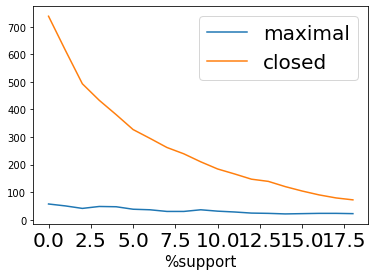

In [149]:
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

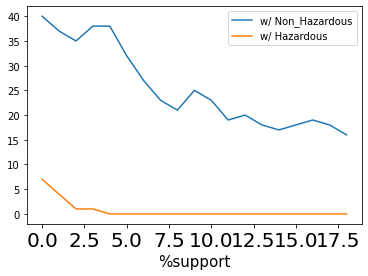

In [24]:
filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Non_Hazardous' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Hazardous' in item[0]]) )
    
plt.plot(filter_1, label='w/ Non_Hazardous')
plt.plot(filter_2, label='w/ Hazardous')
plt.legend(fontsize=10)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

In [ ]:
help(apriori)

In [54]:
results = []
for support in range(1, 21):
    for confidence in range(1, 61):
        itemsets = apriori(X, supp=support, zmin=3, target='r', conf=confidence, report='SCl')
        for e in itemsets: 
            results.append({
                'supp': e[2],
                'conf': e[3],
                'lift': e[4]
            })

In [55]:
df_ = pd.DataFrame(results)

In [56]:
df_lift5 = df_[df_['lift'] <= 5]

In [57]:
df_lift5 = df_lift5.sample(100000)

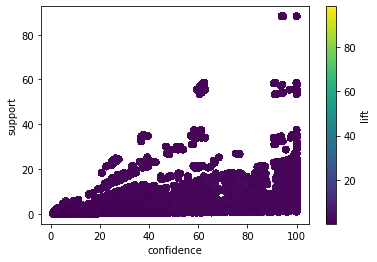

In [58]:
plt.show()
plt.scatter(df_['conf'], df_['supp'], c=df_['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

In [150]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls"
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls"
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls"
...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls"
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls"
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls"
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls"


In [151]:
df['Prediction'] = "NotPredicted"

In [152]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",NotPredicted
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",NotPredicted


In [153]:
df['Prediction']  = np.where(np.logical_and(df['shift'] == 'Coal_getting_shift', (np.logical_and(df['GenergyBin'] == '(52010.0, 1766860.0]_Genergy' ,df['GpulsBin'] == '(661.5, 3915.0]_Gpuls'))),str('Hazardous'),df['Prediction'])

In [154]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",NotPredicted


In [155]:
df['Prediction']  = np.where(np.logical_and(df['nbumps4'] == '0_Nbumps4', (np.logical_and(df['GenergyBin'] == '(52010.0, 1766860.0]_Genergy' ,df['GpulsBin'] == '(661.5, 3915.0]_Gpuls'))),str('Hazardous'),df['Prediction'])

In [156]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",NotPredicted


In [157]:
df['Prediction']  = np.where(np.logical_and(df['seismoacoustic'] == 'Lack_of_hazard', (np.logical_and(df['GenergyBin'] == '(52010.0, 1766860.0]_Genergy' ,df['GpulsBin'] == '(661.5, 3915.0]_Gpuls'))),str('Hazardous'),df['Prediction'])

In [158]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",NotPredicted


In [159]:
df['Prediction']  = np.where(np.logical_and(df['shift'] == 'Coal_getting_shift', (np.logical_and(df['nbumps4'] == '0_Nbumps4', (np.logical_and(df['GenergyBin'] == '(52010.0, 1766860.0]_Genergy' ,df['GpulsBin'] == '(661.5, 3915.0]_Gpuls'))))),str('Hazardous'),df['Prediction'])

In [160]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",NotPredicted


In [161]:
df['Prediction']  = np.where(np.logical_and(df['nbumps5'] == '0_Nbumps5', (np.logical_and(df['shift'] == 'Coal_getting_shift', (np.logical_and(df['nbumps4'] == '0_Nbumps4', (np.logical_and(df['GenergyBin'] == '(52010.0, 1766860.0]_Genergy' ,df['GpulsBin'] == '(661.5, 3915.0]_Gpuls'))))))),str('Hazardous'),df['Prediction'])

In [162]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",NotPredicted
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",NotPredicted
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",NotPredicted


In [167]:
df['Prediction']  = np.where(np.logical_and(df['nbumps5'] == '0_Nbumps5', (np.logical_and(df['seismoacoustic'] == 'Lack_of_hazard', (np.logical_and(df['GenergyBin'] == '(52010.0, 1766860.0]_Genergy' ,df['GpulsBin'] == '(661.5, 3915.0]_Gpuls'))))),str('Hazardous'),df['Prediction'])

In [168]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",Non_Hazardous
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",Non_Hazardous
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",Non_Hazardous


In [169]:
ppp = np.logical_and(df['nbumps4'] == '0_Nbumps4' ,df['nbumps5'] == '0_Nbumps5')
df['Prediction']  = np.where(np.logical_and(ppp, df['Prediction'] == 'NotPredicted'),str('Non_Hazardous'),df['Prediction'])

In [170]:
df

,seismoacoustic,shift,nbumps4,nbumps5,energy,class,GenergyBin,GpulsBin,Prediction
0,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
1,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,2000_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
2,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(99.999, 11560.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
3,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,3000_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
4,Lack_of_hazard,Preparation_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(1.999, 189.0]_Gpuls",Non_Hazardous
...,...,...,...,...,...,...,...,...,...
2558,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(52010.0, 1766860.0]_Genergy","(661.5, 3915.0]_Gpuls",Hazardous
2559,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",Non_Hazardous
2560,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(25390.0, 52010.0]_Genergy","(376.0, 661.5]_Gpuls",Non_Hazardous
2561,Lack_of_hazard,Coal_getting_shift,0_Nbumps4,0_Nbumps5,0_Energy,Non_Hazardous,"(11560.0, 25390.0]_Genergy","(189.0, 376.0]_Gpuls",Non_Hazardous


In [171]:
len(df[df['Prediction'] == 'NotPredicted'])

68

In [172]:
pp = np.logical_and(df['shift'] == 'Coal_getting_shift' ,df['nbumps5'] == '0_Nbumps5')
df['Prediction']  = np.where(np.logical_and(pp, df['Prediction'] == 'NotPredicted'),str('Non_Hazardous'),df['Prediction'])

In [173]:
len(df[df['Prediction'] == 'NotPredicted'])

8

In [174]:
p = np.logical_and(df['seismoacoustic'] == 'Lack_of_hazard' ,df['nbumps5'] == '0_Nbumps5')
df['Prediction']  = np.where(np.logical_and(p, df['Prediction'] == 'NotPredicted'),str('Non_Hazardous'),df['Prediction'])

In [175]:
len(df[df['Prediction'] == 'NotPredicted'])

4

In [176]:
pppp = np.logical_and(df['shift'] == 'Coal_getting_shift' ,df['nbumps4'] == '0_Nbumps4')
df['Prediction']  = np.where(np.logical_and(pppp, df['Prediction'] == 'NotPredicted'),str('Non_Hazardous'),df['Prediction'])

In [177]:
len(df[df['Prediction'] == 'NotPredicted'])

4

In [178]:
df['Prediction']  = np.where(df['Prediction'] == 'NotPredicted',str('Non_Hazardous'),df['Prediction'])

In [179]:
len(df[df['Prediction'] == 'NotPredicted'])

0

In [184]:
len(df[df['Prediction'] == df['class']])

2112

In [185]:
len(df[df.Prediction != df['class']]) 

451

In [209]:
#Falsi negativi
len(df[(df["class"] == 'Hazardous') & (df['Prediction'] == 'Non_Hazardous')])

93

In [210]:
#Falsi positivi
len(df[(df["class"] == 'Non_Hazardous') & (df['Prediction'] == 'Hazardous')])

358

In [211]:
#Veri positivi
len(df[(df["class"] == 'Hazardous') & (df['Prediction'] == 'Hazardous')])

77

In [212]:
#Veri negativi
len(df[(df["class"] == 'Non_Hazardous') & (df['Prediction'] == 'Non_Hazardous')])

2035

In [220]:
from sklearn.metrics import precision_recall_fscore_support

In [240]:
y_true = df['class']
y_pred = df['Prediction']
precision_recall_fscore_support(y_true, y_pred, average='macro')


(0.5666542433670383, 0.6516690838474963, 0.5773943817739438, None)


In [224]:
from sklearn.metrics import accuracy_score, classification_report

In [225]:
accuracy_score(y_true, y_pred)

0.8240343347639485

In [239]:
print(classification_report(y_true, y_pred))

               precision    recall  f1-score   support

    Hazardous       0.18      0.45      0.25       170
Non_Hazardous       0.96      0.85      0.90      2393

     accuracy                           0.82      2563
    macro avg       0.57      0.65      0.58      2563
 weighted avg       0.90      0.82      0.86      2563

